# Just a file to test some stuff

In [9]:
from __future__ import annotations
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from automl import preprocessing

In [10]:
FILE = Path(".").absolute().resolve()
DATADIR = FILE / "data"

In [11]:
path = DATADIR / 'brazilian_houses' / str(1)

In [12]:
X_train_path = path / "X_train.parquet"
y_train_path = path / "y_train.parquet"
X_test_path = path / "X_test.parquet"
y_test_path = path / "y_test.parquet"

In [13]:
X_train=pd.read_parquet(X_train_path)
y_train=pd.read_parquet(y_train_path)
X_test=pd.read_parquet(X_test_path)
y_test=pd.read_parquet(y_test_path)

In [14]:
print("X_train \n", X_train)
print("y_train \n", y_train)
print("X_test \n", X_test)
print("y_test \n", y_test)

X_train 
      city  area  rooms  bathroom  parking_spaces animal furniture  hoa_(BRL)  \
0       3   140      2         2               1      1         1       1600   
1       0    22      1         1               1      1         0          0   
2       4   162      2         2               1      0         1       1804   
3       4    17      1         1               0      1         0        300   
4       2    66      2         1               0      0         1        150   
...   ...   ...    ...       ...             ...    ...       ...        ...   
4324    1    28      1         1               0      1         0          0   
4325    2    40      1         1               1      0         0        400   
4326    4    48      2         1               1      0         1        480   
4327    0   650      7         6               3      0         1          0   
4328    1   115      2         3               2      0         0        687   

      rent_amount_(BRL)  prop

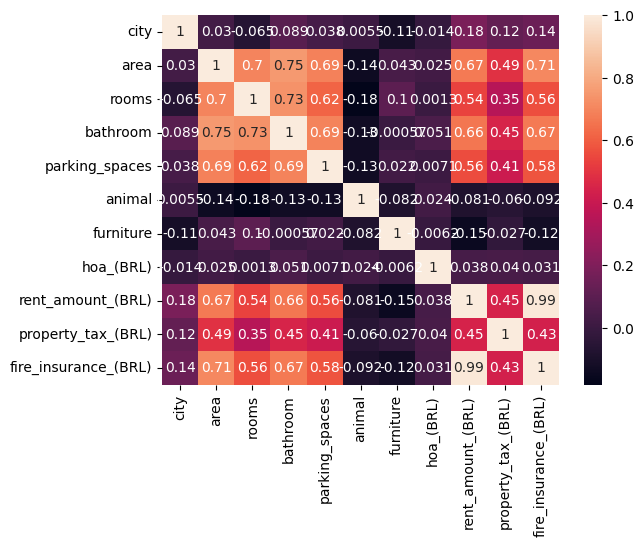

In [15]:
corr = X_train.corr()
sns.heatmap(corr, annot =True)
plt.show()

In [16]:
# model = XGBRegressor(enable_categorical=True, max_depth=6)
# model.fit(X=X_train, y=y_train)
# print(model.get_xgb_params()['max_depth'])
# print('score = ' + str(model.score(X_test, y_test)))
# model

In [17]:
preprocessor = preprocessing.build_numeric_preprocessor()
model_pipeline = Pipeline([
            ("preproc", preprocessor),
            ("model", XGBRegressor(random_state=42))
        ])

model_pipeline.set_params(model__n_estimators=6, model__gamma = 1, model__max_depth = 8)

,steps,"[('preproc', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,steps,"[('robust_scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


<Axes: >

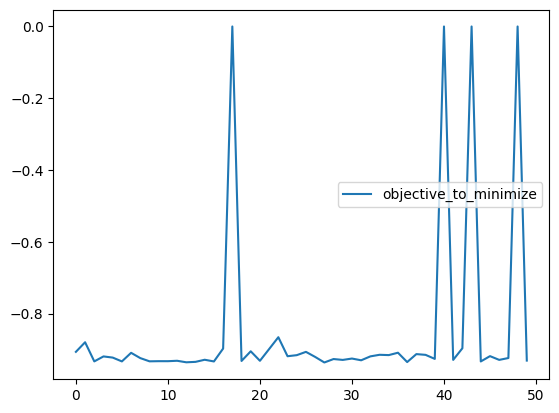

In [18]:
# neps plot
df = pd.read_csv('neps/summary/full.csv')
df = df[['objective_to_minimize']]
df.plot()
